In [1]:
#! Overall task, to implement both RNN and LSTM on pytorch to perform
#! binary conversion according to 3-1_2-RNN_LSTM_Pytorch.ipynb. 
#! this time use files of : binary.npy as x, and decimal.npy as y. 

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls '/content/drive/My Drive/4º Curso/DeepLearning/DeepLearningLabs/Lab4/Publish/data/'
myDrive = '/content/drive/My Drive/4º Curso/DeepLearning/DeepLearningLabs/Lab4/Publish/data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
binary.npy   names	  Sales_store.csv
decimal.npy  RNN-SIN.pkl  Sales_store_mean.csv


In [2]:
import numpy as np
import torch
from operator import truediv
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using ", device)

np.random.seed(1234)

# 1. Data Preprocess and declare 
x = np.array([
    np.full(10000,0),
    np.ones(10000),
    np.full(10000,2)
])
y = np.array([
    [1.0],
    [2.0],
    [3.0]
])

max_y = np.max(y)

x = torch.from_numpy(x).unsqueeze(2).float().to(device)
y = torch.from_numpy(y).float().to(device)
#normalize
y = y/max_y

import torch.nn as nn


Using  cpu


In [0]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size,output_size):
        super(SimpleRNN, self).__init__()
        self.rnn1 = nn.RNN(input_size, hidden_size)
        self.rnn2 = nn.RNN(hidden_size, hidden_size)
        self.rnn3 = nn.RNN(hidden_size, output_size)

    def forward(self, input, hidden=None):
        output,states = self.rnn1(input)
        output,states = self.rnn2(output)
        output,states = self.rnn3(output)
        return output, states
    
class SimpleLSTM(nn.Module):
  #!Task one, complete the model with internal three layer LSTM
    def __init__(self, input_size, hidden_size,output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size)
        self.lstm3 = nn.LSTM(hidden_size, output_size)

    def forward(self, input, hidden=None):
        output,states = self.lstm1(input)
        output,states = self.lstm2(output)
        output,states = self.lstm3(output)
        return output, states
       

rnn = SimpleRNN(input_size = 1, hidden_size = 100, output_size = 1).to(device)
#!Task two, instantiate the lstm
lstm = SimpleLSTM(input_size = 1, hidden_size = 100, output_size = 1).to(device)


In [0]:
optimizerRNN = torch.optim.SGD(rnn.parameters(), lr=0.9)
optimizerLSTM = torch.optim.SGD(rnn.parameters(), lr=0.9)

criterionRNN = nn.MSELoss()
criterionLSTM = nn.MSELoss()

# Hyper Par
number_or_epoch = 100

l_rnn,l_lstm = [],[]
y_rnn,y_lstm = [],[]


In [5]:
for iter in range(number_or_epoch):
    
    optimizerRNN.zero_grad()
    yHatAll,states = rnn(x)
    outputRNN = yHatAll[:,2,:]#we just need last output
    
    lossRNN = criterionRNN(outputRNN,y)
    lossRNN.backward()
    optimizerRNN.step()
    
    l_rnn.append(lossRNN.item())
    y_rnn.append(outputRNN)
    
    #!Task three, perform the forward and optimization following RNN operation
    #!above for LSTM NN. Record the loss.
    optimizerLSTM.zero_grad()
    yHatAll,states = lstm(x)
    outputLSTM = yHatAll[:,2,:]
    
    lossLSTM = criterionLSTM(outputLSTM,y)
    lossLSTM.backward()
    optimizerLSTM.step()
    
    l_lstm.append(lossLSTM.item())
    y_lstm.append(outputLSTM)
    
    if iter%1 == 0:
        print(iter,' lossRNN : ',lossRNN.item(),'lossLSTM : ',lossLSTM.item())
        #print(iter,' lossRNN : ',lossRNN.item())


0  lossRNN :  0.9803217649459839 lossLSTM :  0.3125547468662262
1  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
2  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
3  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
4  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
5  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
6  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
7  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
8  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
9  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
10  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
11  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
12  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
13  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
14  lossRNN :  0.18518516421318054 lossLSTM :  0.3125547468662262
15  lossRNN :  0.1851

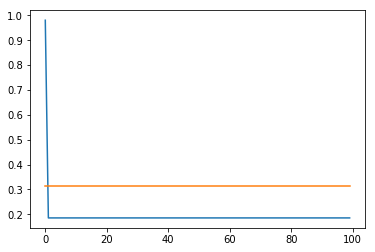

[tensor([[-0.2899],
        [-0.2935],
        [-0.2770]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
        [1.],
        [1.]], grad_fn=<SliceBackward>), tensor([[1.],
    

In [6]:
plt.plot(l_rnn)
plt.plot(l_lstm)
plt.show()

print(y_rnn)
print(y_lstm)